 ##  **Introducation**

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.


In [1]:
# the following are the important Package used for this EDA process

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import random 
import warnings
warnings.filterwarnings("ignore")
import matplotlib as matplot
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

#import os
#print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

 ## Importing The Dataset

In [2]:
application_train = pd.read_csv('B:\\Spam_or_Ham\\Home Credit default risk\\application_train.csv')
application_test= pd.read_csv('B:\\Spam_or_Ham\\Home Credit default risk\\application_test.csv')
bureau = pd.read_csv('B:\\Spam_or_Ham\\Home Credit default risk\\bureau.csv')
bureau_balance = pd.read_csv('B:\\Spam_or_Ham\\Home Credit default risk\\bureau_balance.csv')
POS_CASH_balance = pd.read_csv('B:\\Spam_or_Ham\\Home Credit default risk\\POS_CASH_balance.csv')
credit_card_balance = pd.read_csv('B:\\Spam_or_Ham\\Home Credit default risk\\credit_card_balance.csv')
previous_application = pd.read_csv('B:\\Spam_or_Ham\\Home Credit default risk\\previous_application.csv')
installments_payments = pd.read_csv('B:\\Spam_or_Ham\\Home Credit default risk\\installments_payments.csv')

## Data Description

appliction_train & application_test

This is the main table, broken into two files for Train (with TARGET) and Test (without TARGET).
Static data for all applications. One row represents one loan in our data sample.

bureau

All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample).
For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.

bureau_balance

Monthly balances of previous credits in Credit Bureau.
This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (#loans in sample * # of relative previous credits * # of months where we have some history observable for the previous credits) rows.

POS_CASH_balance

Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit.
This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credits * # of months in which we have some history observable for the previous credits) rows.

credit_card_balance

Monthly balance snapshots of previous credit cards that the applicant has with Home Credit.
This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credit cards * # of months where we have some history observable for the previous credit card) rows.

previous_application

All previous applications for Home Credit loans of clients who have loans in our sample.
There is one row for each previous application related to loans in our data sample.

installments_payments

Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample.
There is a) one row for every payment that was made plus b) one row each for missed payment.
One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit credit related to loans in our sample.



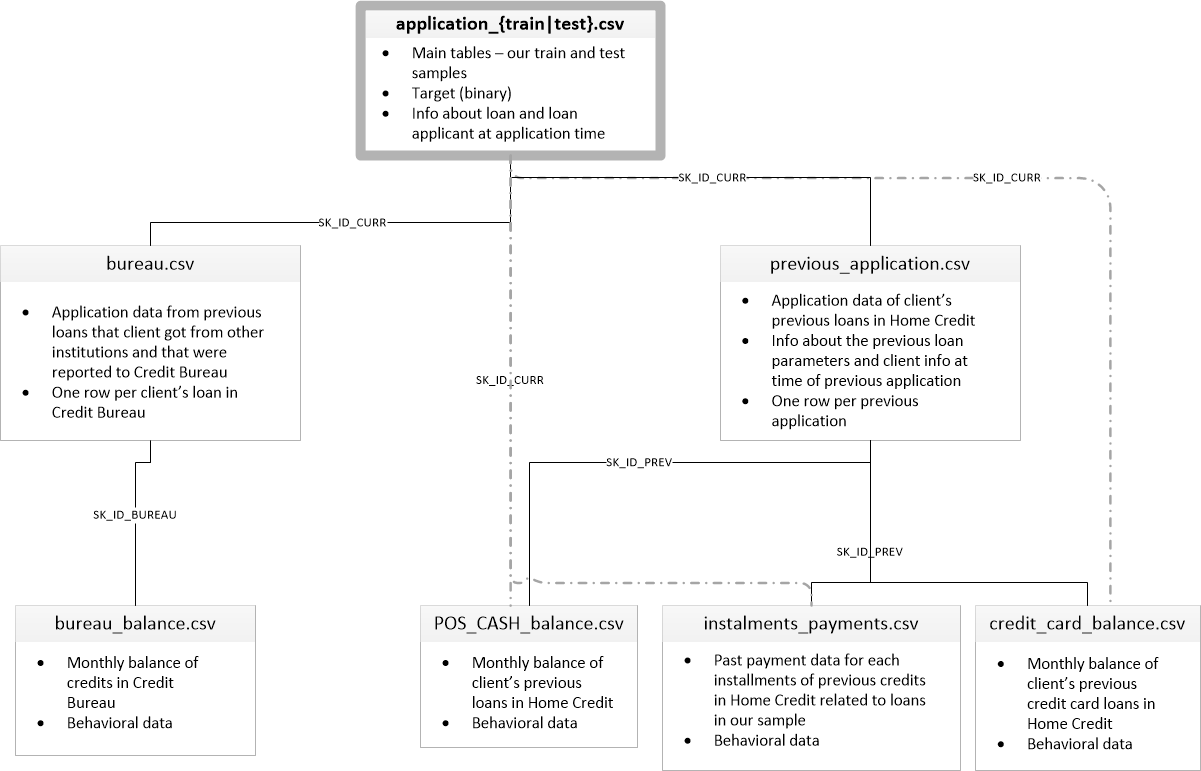

2. ### Number of records and Features in the datasets
2.1. ** Let Examine the Applaication Train DataSet**

In [4]:
print("The number of Features in application train dataset :",application_train.shape[1])
print("The number of Rows in application Train dataset :",application_train.shape[0])

The number of Features in application train dataset : 122
The number of Rows in application Train dataset : 307511


In [5]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### Identifying Numerical and Categorical Features

###  Function for  find out Numerical and categeical Variables

In [6]:
def type_features(data):
    categorical_features = data.select_dtypes(include = ["object"]).columns
    numerical_features = data.select_dtypes(exclude = ["object"]).columns
    print( "categorical_features :",categorical_features)
    print('-----'*40)
    print("numerical_features:",numerical_features)
    


In [7]:
type_features(application_train)

categorical_features : Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
numerical_features: Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_

### Identifying Missing Value Present in Application Train Dataset

In [11]:

def missingdata(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    ms= ms[ms["Percent"] > 0]
    f,ax =plt.subplots(figsize=(15,10))
    plt.xticks(rotation='90')
    fig=sns.barplot(ms.index, ms["Percent"],color="green",alpha=0.8)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)
    #ms= ms[ms["Percent"] > 0]
    return ms

,Total,Percent
COMMONAREA_MEDI,33495,68.716150
COMMONAREA_AVG,33495,68.716150
COMMONAREA_MODE,33495,68.716150
NONLIVINGAPARTMENTS_MODE,33347,68.412523
NONLIVINGAPARTMENTS_MEDI,33347,68.412523
NONLIVINGAPARTMENTS_AVG,33347,68.412523
FONDKAPREMONT_MODE,32797,67.284179
LIVINGAPARTMENTS_AVG,32780,67.249302
LIVINGAPARTMENTS_MEDI,32780,67.249302
LIVINGAPARTMENTS_MODE,32780,67.249302


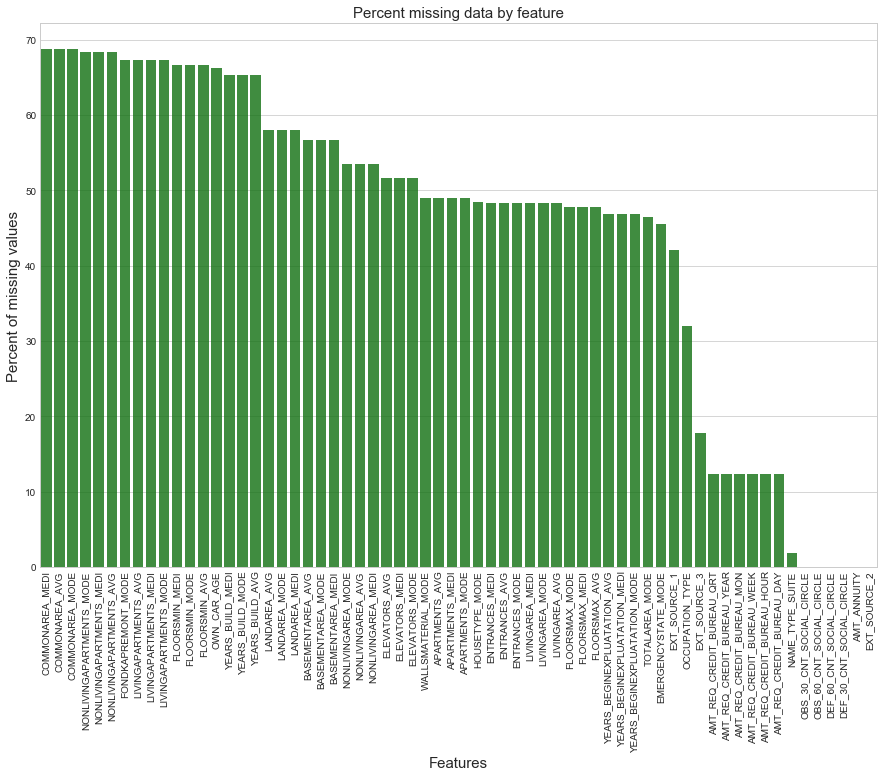

In [12]:
missingdata(application_test)

### The above given figure which clear say about the which features has missing value and precentage of missing value avaiable in application_train DataSet

### Let us Examine application_test data set

In [13]:
application_test.head(7)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,100042,Cash loans,F,Y,Y,0,270000.0,959688.0,34600.5,810000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
6,100057,Cash loans,M,Y,Y,2,180000.0,499221.0,22117.5,373500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


In [14]:
print("the number columns in the application_test dataset",application_test.shape[1])
print("the number rows in application_test dataset",application_test.shape[0])

the number columns in the application_test dataset 121
the number rows in application_test dataset 48744


### identifying the Catergical and numberical variables 

In [15]:
type_features(application_test)

categorical_features : Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
numerical_features: Index(['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_

### identifying the missing values

,Total,Percent
COMMONAREA_MEDI,33495,68.716150
COMMONAREA_AVG,33495,68.716150
COMMONAREA_MODE,33495,68.716150
NONLIVINGAPARTMENTS_MODE,33347,68.412523
NONLIVINGAPARTMENTS_MEDI,33347,68.412523
NONLIVINGAPARTMENTS_AVG,33347,68.412523
FONDKAPREMONT_MODE,32797,67.284179
LIVINGAPARTMENTS_AVG,32780,67.249302
LIVINGAPARTMENTS_MEDI,32780,67.249302
LIVINGAPARTMENTS_MODE,32780,67.249302


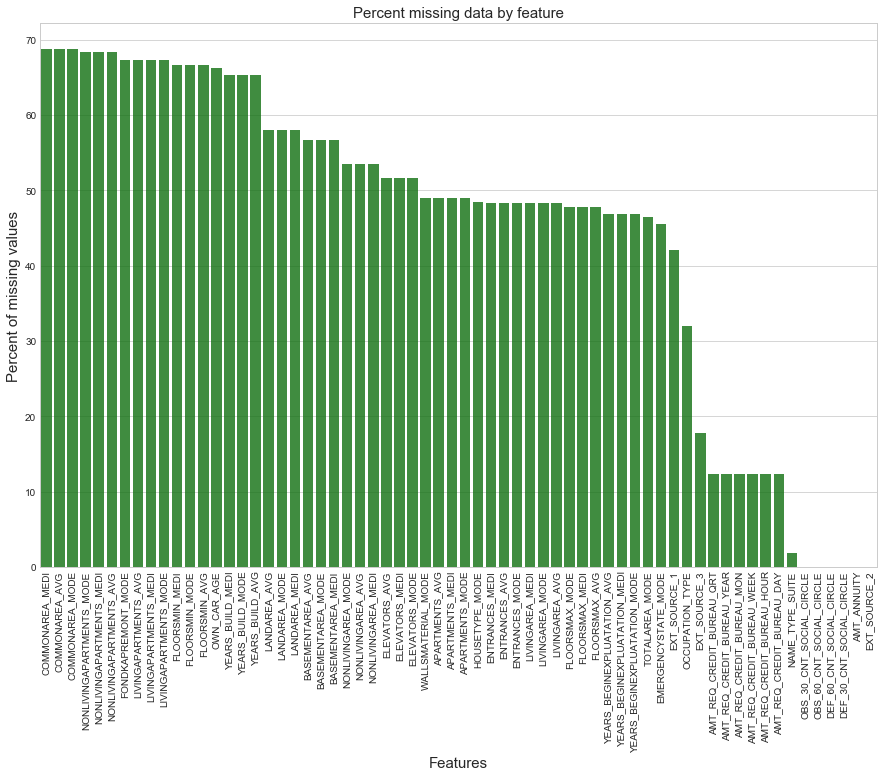

In [16]:
missingdata(application_test)

### Let Exmaine bureau dataset

In [17]:
bureau.head(6)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.00,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.00,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN
5,215354,5714467,Active,currency 1,-273,0,27460.0,NaN,0.0,0,180000.0,71017.38,108982.62,0.0,Credit card,-31,NaN


In [18]:
print("The number of features is :",bureau.shape[1],"The number of row is:",bureau.shape[0])

The number of features is : 17 The number of row is: 1716428


### identifying the catergical and numnerical features  

In [19]:
type_features(bureau)

categorical_features : Index(['CREDIT_ACTIVE', 'CREDIT_CURRENCY', 'CREDIT_TYPE'], dtype='object')
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
numerical_features: Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE',
       'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE',
       'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT',
       'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE', 'DAYS_CREDIT_UPDATE',
       'AMT_ANNUITY'],
      dtype='object')


### identying the missing data

,Total,Percent
AMT_ANNUITY,1226791,71.473490
AMT_CREDIT_MAX_OVERDUE,1124488,65.513264
DAYS_ENDDATE_FACT,633653,36.916958
AMT_CREDIT_SUM_LIMIT,591780,34.477415
AMT_CREDIT_SUM_DEBT,257669,15.011932
DAYS_CREDIT_ENDDATE,105553,6.149573
AMT_CREDIT_SUM,13,0.000757


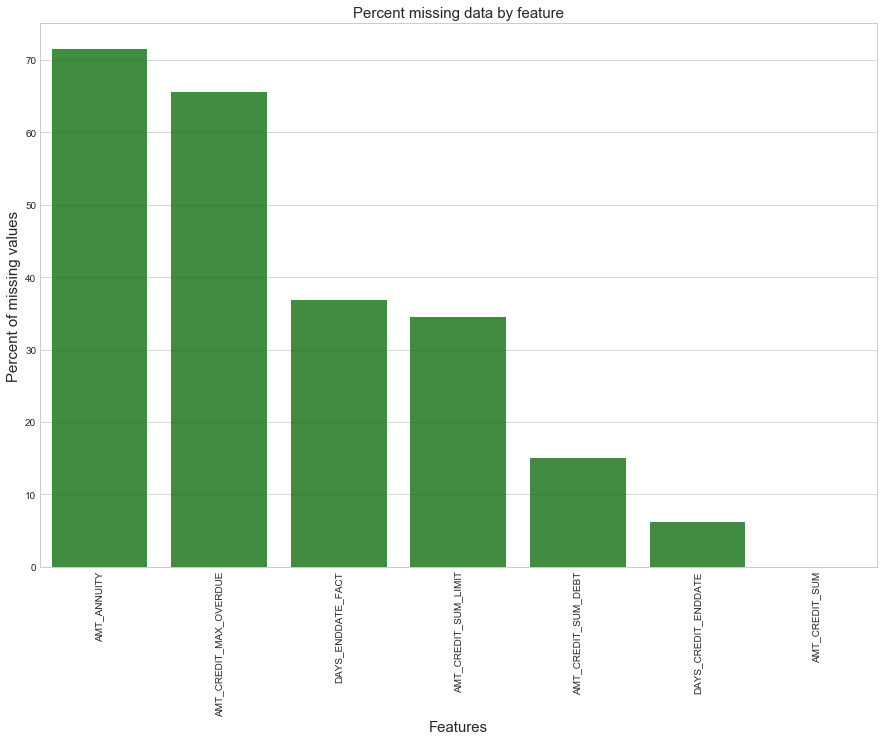

In [20]:
missingdata(bureau)

### Exmaine the bureau_balance DataSet

In [21]:
bureau_balance.head(7)

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C
5,5715448,-5,C
6,5715448,-6,C


In [22]:
print("the number of columns",bureau_balance.shape[1],"the number of rows :",bureau_balance.shape[0])

the number of columns 3 the number of rows : 27299925


## identifying Catergical and numerical variables

In [23]:
type_features(bureau_balance)

categorical_features : Index(['STATUS'], dtype='object')
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
numerical_features: Index(['SK_ID_BUREAU', 'MONTHS_BALANCE'], dtype='object')


### identifying the missing value in bureau_balance

In [24]:
total = bureau_balance.isnull().sum().sort_values(ascending = False)
percent = (bureau_balance.isnull().sum()/bureau_balance.isnull().count()*100).sort_values(ascending = False)
ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
ms= ms[ms["Percent"] > 0]
ms

,Total,Percent


### No missing data in Bureau Balance Dataset

## Exmaine the POS_CASH_balance DataSet

In [25]:
POS_CASH_balance.head(6)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0
5,2207092,342166,-32,12.0,12.0,Active,0,0


In [26]:
POS_CASH_balance.shape

(10001358, 8)

### identifying the Catergical and numerical variables 

In [27]:
type_features(POS_CASH_balance)

categorical_features : Index(['NAME_CONTRACT_STATUS'], dtype='object')
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
numerical_features: Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'CNT_INSTALMENT',
       'CNT_INSTALMENT_FUTURE', 'SK_DPD', 'SK_DPD_DEF'],
      dtype='object')


### identifying the missing values

,Total,Percent
CNT_INSTALMENT_FUTURE,26087,0.260835
CNT_INSTALMENT,26071,0.260675


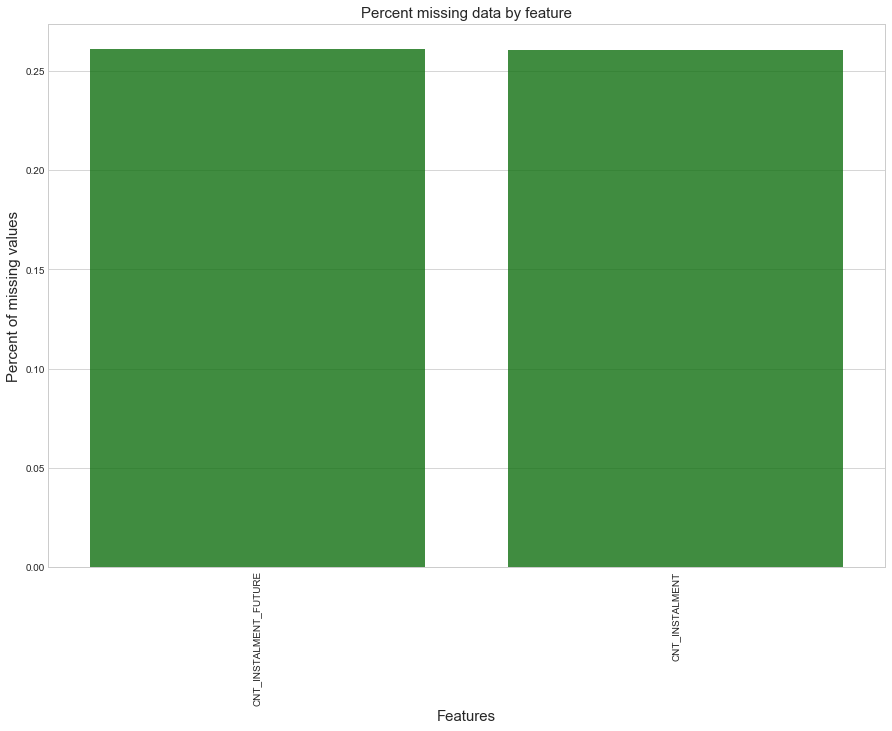

In [28]:
missingdata(POS_CASH_balance)

### Examine the credit_card_balance dataset

In [29]:
credit_card_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [30]:
print("the number columns in dataset:",credit_card_balance.shape[1],"The number of rows:",credit_card_balance.shape[0])

the number columns in dataset: 23 The number of rows: 3840312


### identifying the Categerical and numerical Variable 

In [31]:
type_features(credit_card_balance)

categorical_features : Index(['NAME_CONTRACT_STATUS'], dtype='object')
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
numerical_features: Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE',
       'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT',
       'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT',
       'CNT_INSTALMENT_MATURE_CUM', 'SK_DPD', 'SK_DPD_DEF'],
      dtype='object')


### identifying the missing value in credit_card_balance dataset

,Total,Percent
AMT_PAYMENT_CURRENT,767988,19.998063
AMT_DRAWINGS_OTHER_CURRENT,749816,19.524872
CNT_DRAWINGS_POS_CURRENT,749816,19.524872
CNT_DRAWINGS_OTHER_CURRENT,749816,19.524872
CNT_DRAWINGS_ATM_CURRENT,749816,19.524872
AMT_DRAWINGS_ATM_CURRENT,749816,19.524872
AMT_DRAWINGS_POS_CURRENT,749816,19.524872
CNT_INSTALMENT_MATURE_CUM,305236,7.948208
AMT_INST_MIN_REGULARITY,305236,7.948208


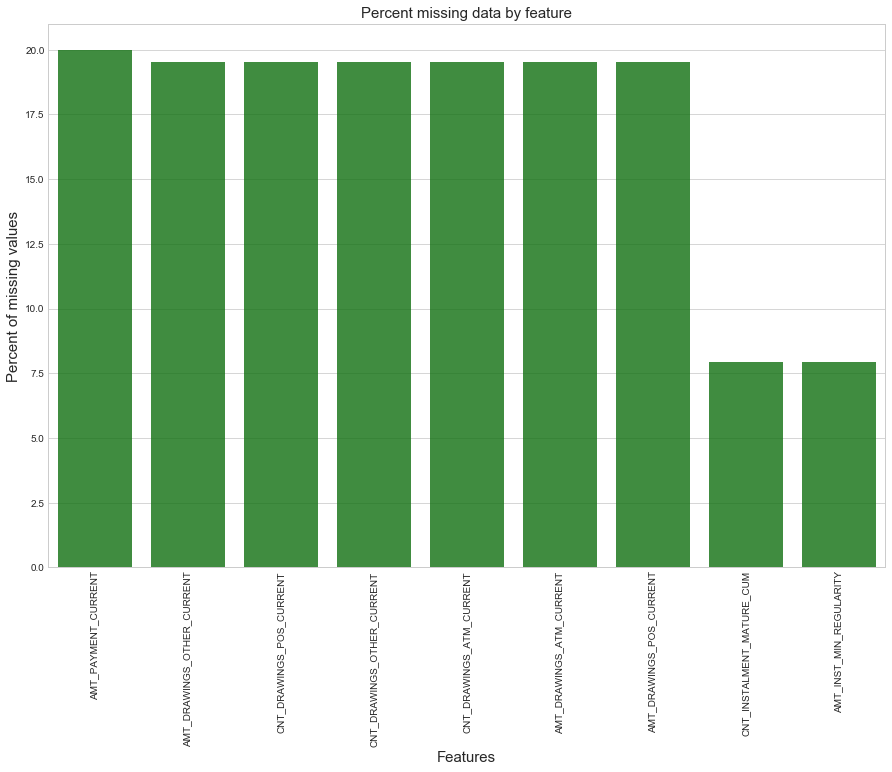

In [32]:
missingdata(credit_card_balance)

### Exmaine the previous_application Dataset

In [33]:
previous_application.head(7)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,NaN,315000.0,SATURDAY,8,...,XNA,18.0,low_normal,Cash X-Sell: low,365243.0,-654.0,-144.0,-144.0,-137.0,1.0
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


 ### identifying the catergical and numerical variable in previous application Data set.

In [34]:
type_features(previous_application)

categorical_features : Index(['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
       'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
numerical_features: Index(['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'DAYS_DECISION', 'SELLERPLACE_AREA',
       'CNT_PAYME

### identifying the missing value in previous_application

,Total,Percent
RATE_INTEREST_PRIVILEGED,1664263,99.643698
RATE_INTEREST_PRIMARY,1664263,99.643698
RATE_DOWN_PAYMENT,895844,53.636480
AMT_DOWN_PAYMENT,895844,53.636480
NAME_TYPE_SUITE,820405,49.119754
DAYS_TERMINATION,673065,40.298129
NFLAG_INSURED_ON_APPROVAL,673065,40.298129
DAYS_FIRST_DRAWING,673065,40.298129
DAYS_FIRST_DUE,673065,40.298129
DAYS_LAST_DUE_1ST_VERSION,673065,40.298129


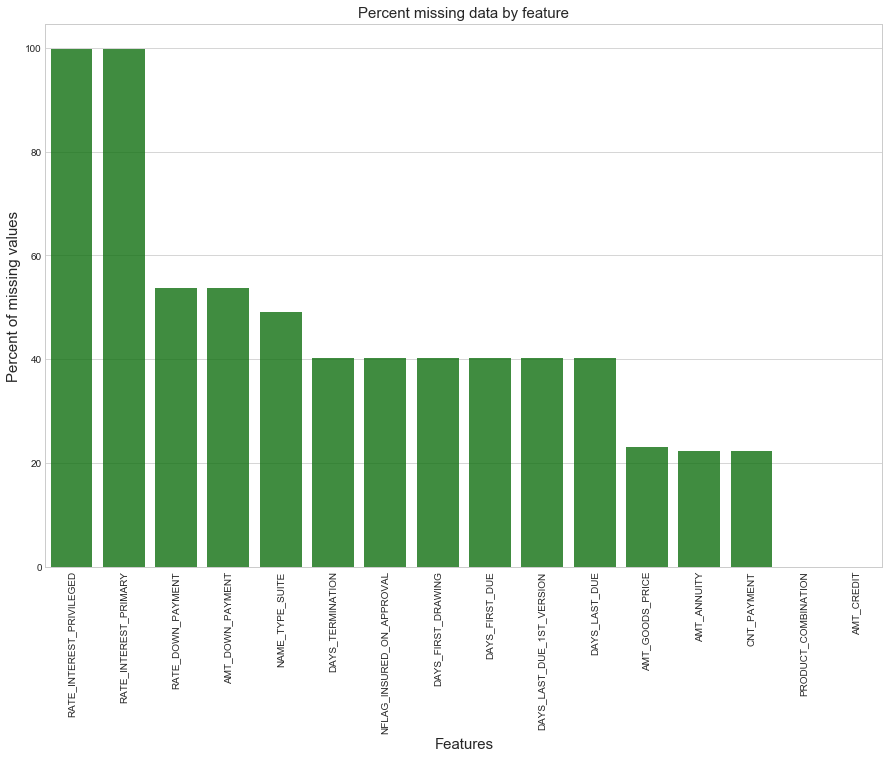

In [35]:
missingdata(previous_application)

### Exmaine the installments_payments dataset

In [36]:
installments_payments.head(7)

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585
5,1137312,164489,1.0,12,-1384.0,-1417.0,5970.375,5970.375
6,2234264,184693,4.0,11,-349.0,-352.0,29432.295,29432.295


### identifying the categerical and numerical Variable 

In [37]:
type_features(installments_payments)

categorical_features : Index([], dtype='object')
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
numerical_features: Index(['SK_ID_PREV', 'SK_ID_CURR', 'NUM_INSTALMENT_VERSION',
       'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT',
       'AMT_INSTALMENT', 'AMT_PAYMENT'],
      dtype='object')


### identifying the missing value in installments_payments

,Total,Percent
AMT_PAYMENT,2905,0.021352
DAYS_ENTRY_PAYMENT,2905,0.021352


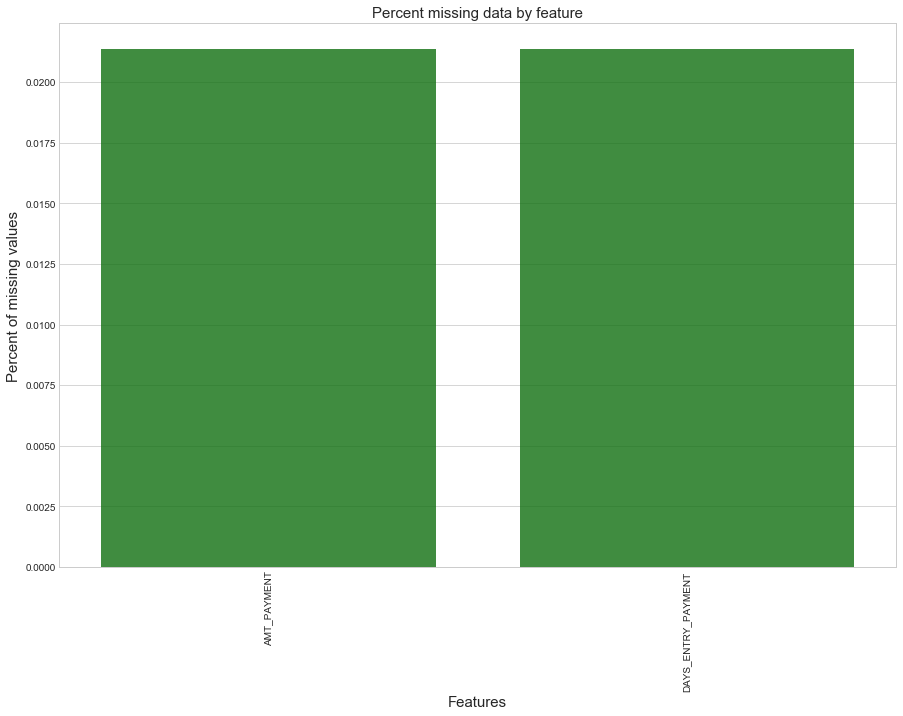

In [38]:
missingdata(installments_payments)

## Checking the Imbalance of Target Variable

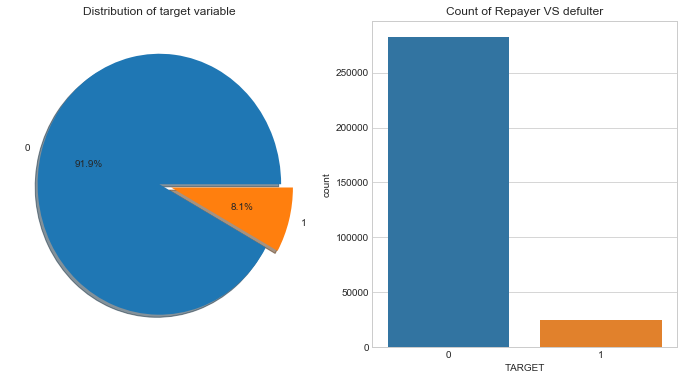

In [39]:
f,ax=plt.subplots(1,2,figsize=(12,6))
application_train.TARGET.value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Distribution of target variable')
ax[0].set_ylabel('')
sns.countplot('TARGET',data=application_train,ax=ax[1])
ax[1].set_title('Count of Repayer VS defulter')
plt.show()

It is evident that  many customer are able to pay the loan back i.e Only 91.9% of the total customer are repaying the loan.
We need to drill down more to get better insights from the data and see which categories of the customer are not able to pay back loan.

We will try to check the repayer and defualter rate by using the different features of the dataset. 
Some of the features being Gender,Education,Employment_type,etc. First let us understand the different types of features.

## Types Of Features

### Categorical Features:
A categorical variable is one that has two or more categories and each value in that feature can be categorised by them.For example, 
Name Education Type is a categorical variable having Five categories. Now we cannot sort or give any ordering to such variables. They are also known as Nominal Variables.

Categorical Features in the dataset: Education_type,occupation_type,Contract_type

### Analysing The Features
***Eduaction-----> Categorical Feature***

In [40]:
def group_by(df,t1='',t2=''):
    a1=df.groupby([t1,t2])[t2].count()
    return a1

In [41]:
def plot_re(df,t1='',t2=''):
    f,ax=plt.subplots(1,2,figsize=(10,6))
    df[[t1,t2]].groupby([t1]).count().plot.bar(ax=ax[0],color='Green')
    ax[0].set_title('count of customer Based on'+t1)
    sns.countplot(t1,hue=t2,data=df,ax=ax[1],palette="spring")
    ax[1].set_title(t1+': Repayer vs Defualter')
    # Rotate x-labels
    plt.xticks(rotation=-90)
    a=plt.show()
    return a

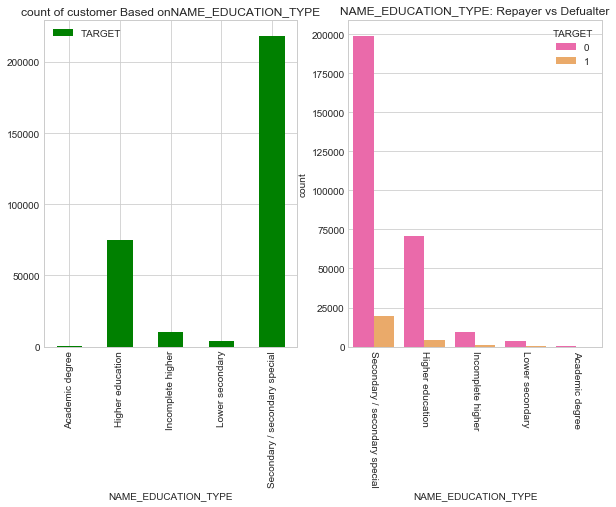

In [42]:
plot_re(application_train,'NAME_EDUCATION_TYPE','TARGET')

### the proof is  edvined by looking at the above given plot and groupby function is clearly customer with education of secondary/secondary special has high  count where not able to pay loan back.

## Analysis based on Code  Gender 

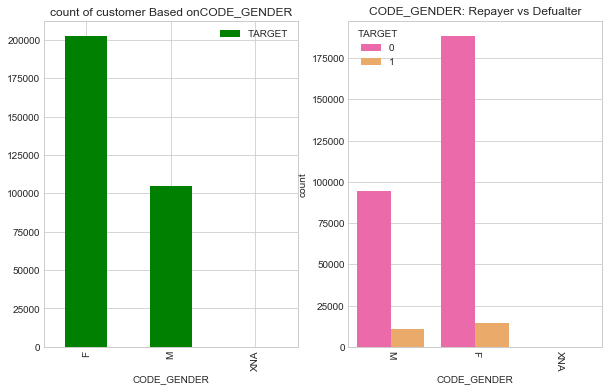

In [43]:
plot_re(application_train,'CODE_GENDER','TARGET')

### its clear that  by looking at the above given plot and groupby function is clearly customer based on code gender type female  has high  count where not able to pay loan back compare to male.

### Analysis based on INCOME TYPE

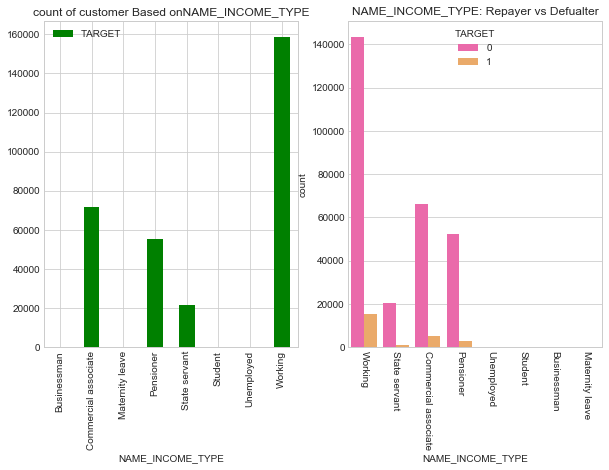

In [44]:
plot_re(application_train,'NAME_INCOME_TYPE','TARGET')

### its clear that  by looking at the above given plot and groupby function is clearly customer based on code income type and the working  has high  count where not able to pay loan back compare to all other

### Analysis based on OCCUPATION TYPE

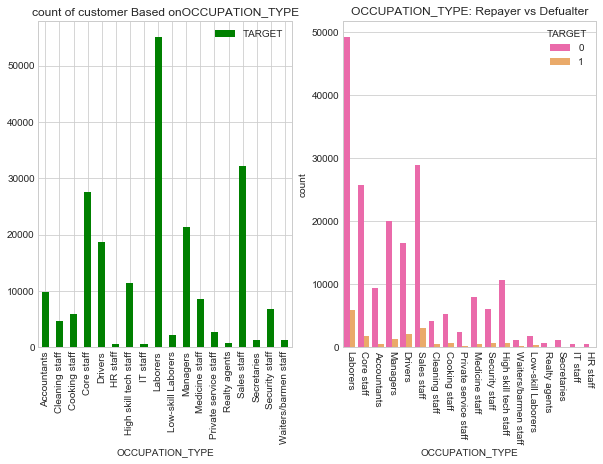

In [45]:
plot_re(application_train,'OCCUPATION_TYPE','TARGET')

###  its clear that  by looking at the above given plot and groupby function is clearly customer based on occupation  type. the working  has high  count where not able to pay loan back compare to all other.

### Analysis Based on FAMILY STATUS

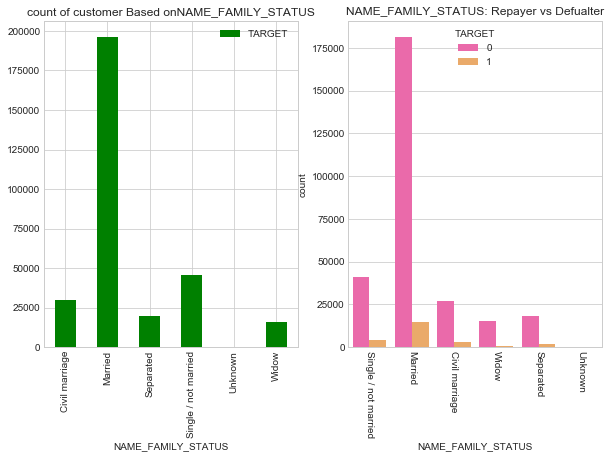

In [46]:
plot_re(application_train,'NAME_FAMILY_STATUS','TARGET')

### its clear that  by looking at the above given plot and groupby function is clearly customer based on code Family type and the Married customer  has high  count where not able to pay loan back compare to all other.


### Analysis based HOUSING TYPE

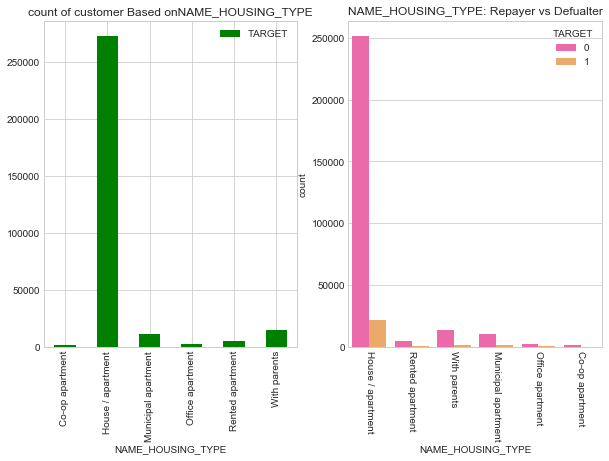

In [47]:
plot_re(application_train,'NAME_HOUSING_TYPE','TARGET')

### its clear that  by looking at the above given plot and groupby function is clearly customer based on Housing type and the house type customer  has high  count where not able to pay loan back compare to all other.

### Analysis based on TYPE SUITE

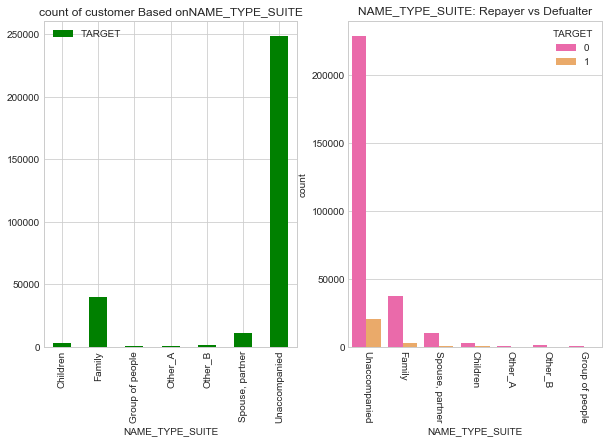

In [48]:
plot_re(application_train,'NAME_TYPE_SUITE','TARGET')

### its clear that  by looking at the above given plot and groupby function is clearly customer based on Suite type and the unaccompanied customer  has high  count where not able to pay loan back compare to all other.

### Analysis Based on ORGANIZATION TYPE

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57]), <a list of 58 Text xticklabel objects>)

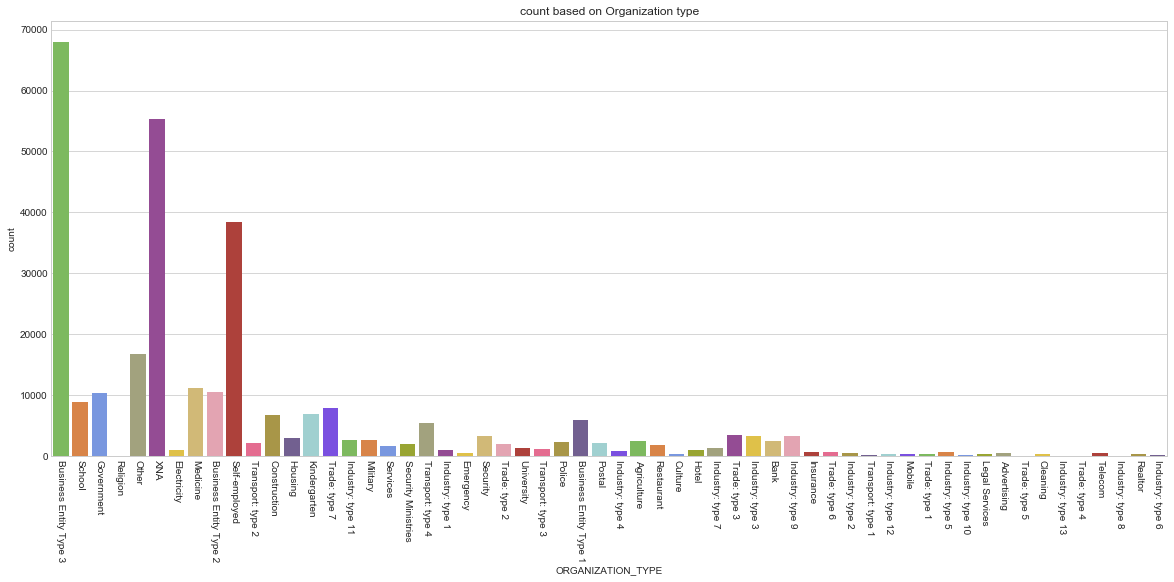

In [49]:
f, ax = plt.subplots(figsize=(20, 8))
# Employee distri
# Types of colors
color_types = ['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0','#F8D030',  
                '#E0C068','#EE99AC','#C03028','#F85888','#B8A038','#705898','#98D8D8','#7038F8']

# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='ORGANIZATION_TYPE', data=application_train, palette=color_types).set_title('count based on Organization type');
 
# Rotate x-labels
plt.xticks(rotation=-90)

Text(0.5,1,'REpayer VS Defaulter based on Organization type')

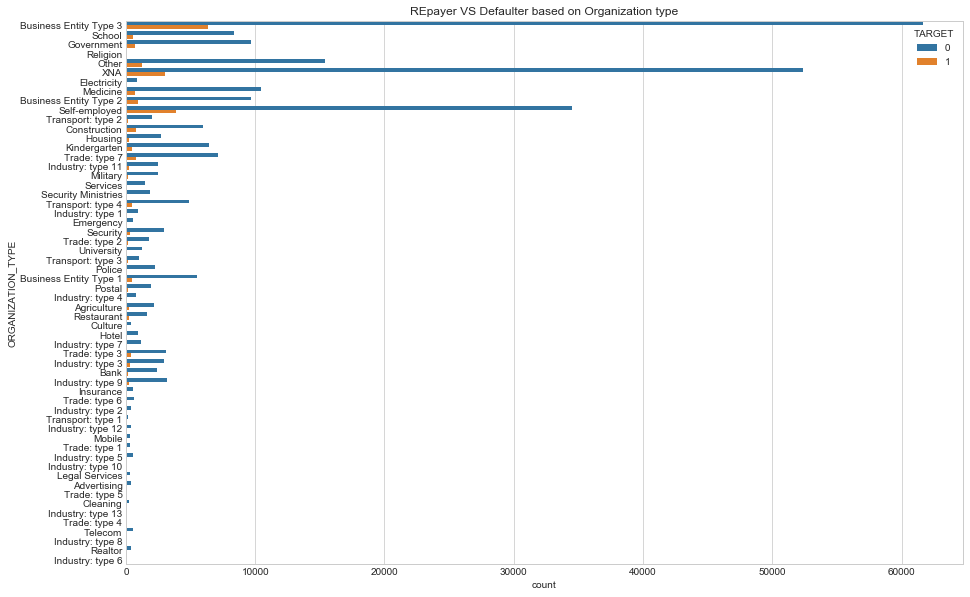

In [50]:
f, ax = plt.subplots(figsize=(15, 10))
sns.countplot(y="ORGANIZATION_TYPE", hue='TARGET', 
              data=application_train).set_title('REpayer VS Defaulter based on Organization type')

### its clear that  by looking at the above given plot and groupby function is clearly customer based on Organization type and the Business type 3 customer  has high  count where not able to pay loan back compare to all other.

### Analysis based on FLAG OWN CAR

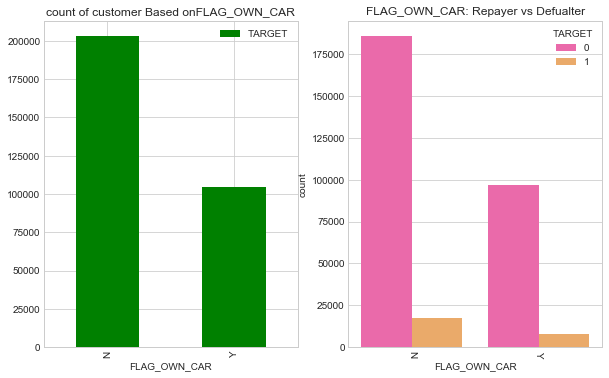

In [51]:
plot_re(application_train,'FLAG_OWN_CAR','TARGET')

### its clear that  by looking at the above given plot and groupby function is clearly customer based on owning car type and the customer with no car  has high  count where not able to pay loan back compare to all other.

### Analysis based on FLAG_OWN_REALTY

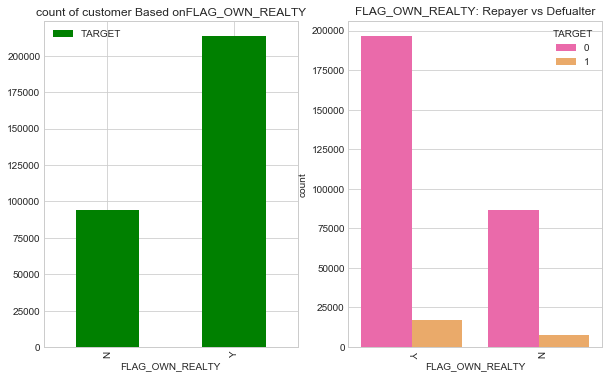

In [52]:
plot_re(application_train,'FLAG_OWN_REALTY','TARGET')

### its clear that  by looking at the above given plot and groupby function is clearly customer based on owning Reality type and the customer has Reality  has high  count where not able to pay loan back compare to all other.

### Analysis based on NAME_CONTRACT_TYPE

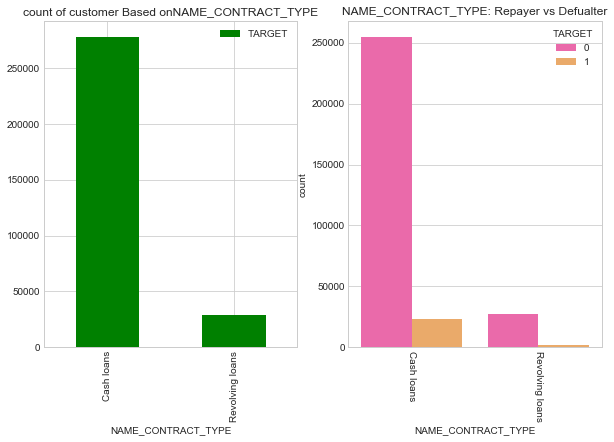

In [53]:
plot_re(application_train,'NAME_CONTRACT_TYPE','TARGET')

### its clear that  by looking at the above given plot and groupby function is clearly customer based on Contract type and the customer with cash loans  has high  count where not able to pay loan back compare to all other.

### Analysis based on WEEKDAY_APPR_PROCESS_START

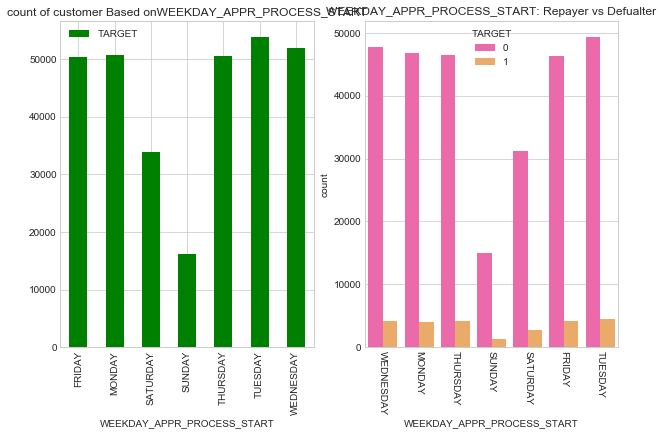

In [54]:
plot_re(application_train,'WEEKDAY_APPR_PROCESS_START','TARGET')

### its clear that  by looking at the above given plot and groupby function is clearly customer based application start on days and the customer registed  on tuesday  has high  count were not able to pay loan back compare to all other.

### Analysis based House Type Mode

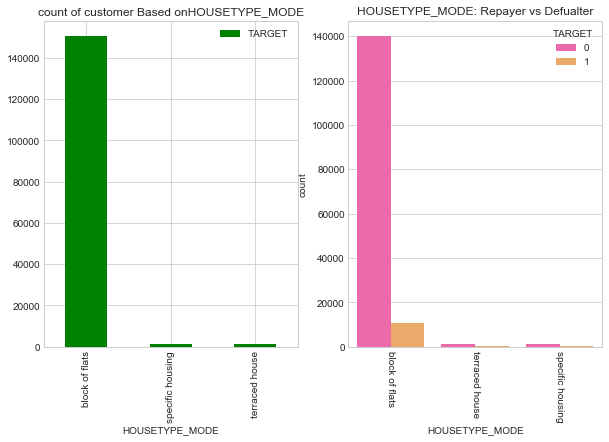

In [55]:
plot_re(application_train,'HOUSETYPE_MODE','TARGET')

### its clear that  by looking at the above given plot and groupby function is clearly customer based Housetype Mode and the customer registed  on Block of flats has high  count where not able to pay loan back compare to all other.

### Analysis Based on EMERGENCYSTATE MODE 

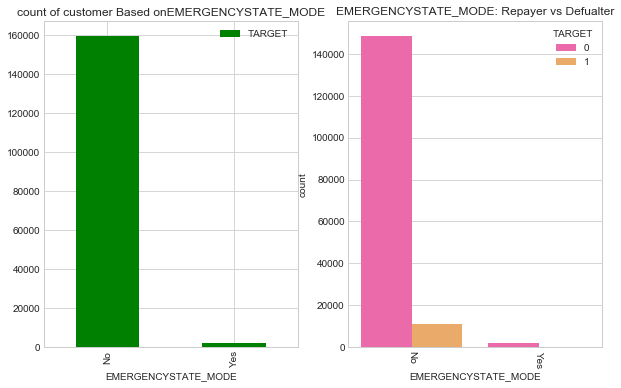

In [56]:
plot_re(application_train,'EMERGENCYSTATE_MODE','TARGET')

### its clear that  by looking at the above given plot and groupby function is clearly customer based Emergency state Mode and the customer has No  has high  count where not able to pay loan back compare to all other.

### ANALYSIS THE NUMBERICAL FEATURES 


#### ANALYZSIS BASED ON  COUNT CHILDREN 

Text(0.5,1,'Children count Distribution - Repayer V.S. Non Repayers')

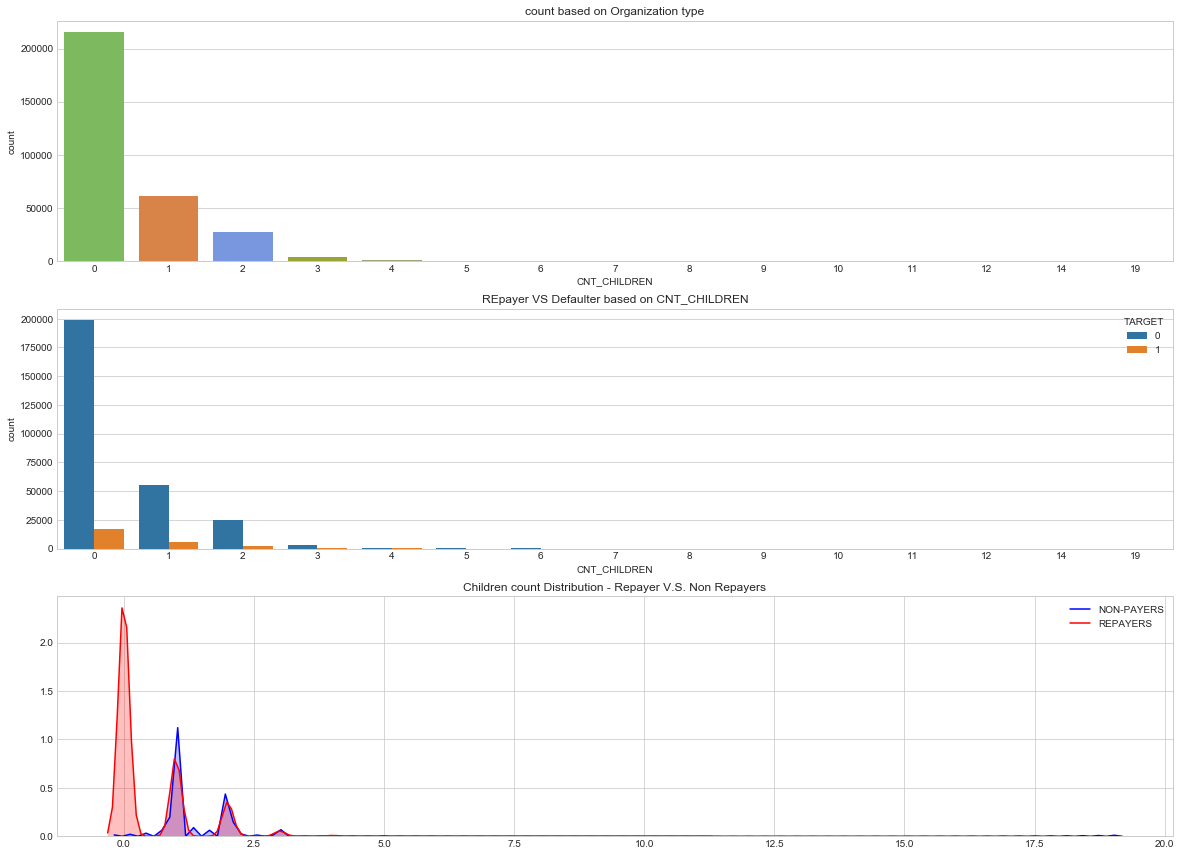

In [57]:
sns.set_style('whitegrid')
f, ax = plt.subplots(3,1,figsize=(20,15))

# Types of colors
color_types = ['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0','#F8D030',  
                '#E0C068','#EE99AC','#C03028','#F85888','#B8A038','#705898','#98D8D8','#7038F8']

# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='CNT_CHILDREN', data=application_train, ax=ax[0],palette=color_types).set_title('count based on Organization type');
sns.countplot("CNT_CHILDREN", hue='TARGET', 
              data=application_train,ax=ax[1]).set_title('REpayer VS Defaulter based on CNT_CHILDREN')
ax[2]=sns.kdeplot(application_train.loc[(application_train['TARGET'] == 0),'CNT_CHILDREN'] , color='b',shade=True,label='NON-PAYERS')
ax[2]=sns.kdeplot(application_train.loc[(application_train['TARGET'] == 1),'CNT_CHILDREN'] , color='r',shade=True, label='REPAYERS')
ax[2].set_title('Children count Distribution - Repayer V.S. Non Repayers')


its clear that  by looking at the above given plots and groupby function is clearly customer based count of children and the customer with   has No  children has high  count and customer with more than  8   50% of non payer based on it own count where not able to pay loan back compare to all other.

Text(0.5,1,'customer Amount Annual income Distribution')

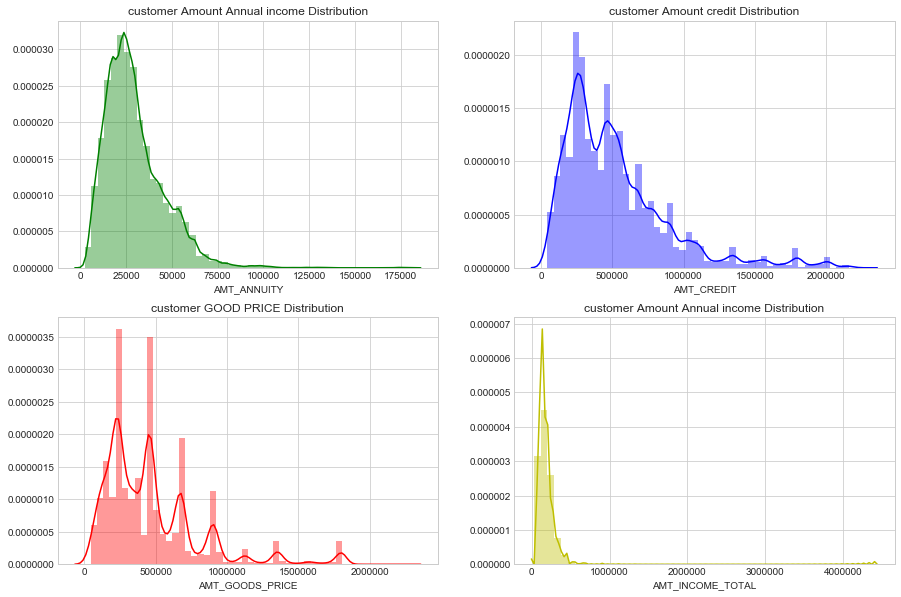

In [58]:
# Set up the matplotlib figure
f, ax = plt.subplots(2,2, figsize=(15, 10))

# Graph amt annutiy Satisfaction
sns.distplot(application_test.AMT_ANNUITY.dropna(), kde=True, color="g", ax=ax[0,0]).set_title('customer Amount Annual income Distribution')


# Graph amt credit Evaluation
sns.distplot(application_test.AMT_CREDIT.dropna(), kde=True, color="b", ax=ax[0,1]).set_title('customer Amount credit Distribution')

# Graph anaual GOOD PRICE  
sns.distplot(application_test.AMT_GOODS_PRICE.dropna(), kde=True, color="r", ax=ax[1,0]).set_title('customer GOOD PRICE Distribution')


sns.distplot(application_test.AMT_INCOME_TOTAL.dropna(), kde=True, color="y", ax=ax[1,1]).set_title('customer Amount Annual income Distribution')



### if we see  the above given distrbution plot it clear say major distrbuiton  for amouth annuity is from 0 to 75000 and amount of anual income is from 0 to 1000000

Text(0.5,1,'customer Days of Registration Distribution')

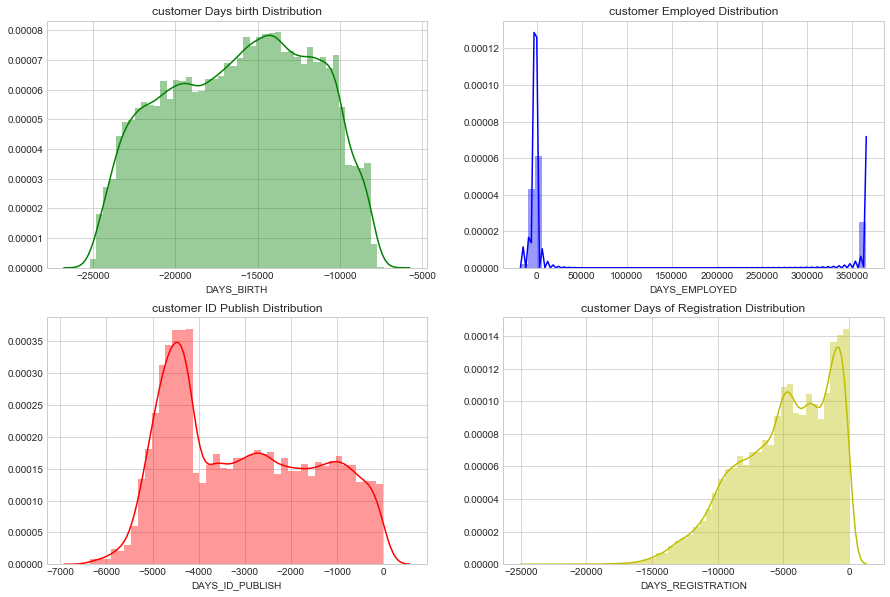

In [59]:
sns.set_style('whitegrid')
# Set up the matplotlib figure
f, ax = plt.subplots(2,2, figsize=(15, 10))

# Graph amt annutiy Satisfaction
sns.distplot(application_test.DAYS_BIRTH.dropna(), kde=True, color="g", ax=ax[0,0]).set_title('customer Days birth Distribution')

sns.distplot(application_test.DAYS_EMPLOYED.dropna(), kde=True, color="b", ax=ax[0,1]).set_title('customer Employed Distribution')

sns.distplot(application_test.DAYS_ID_PUBLISH.dropna(), kde=True, color="r", ax=ax[1,0]).set_title('customer ID Publish Distribution')


sns.distplot(application_test.DAYS_REGISTRATION.dropna(), kde=True, color="y", ax=ax[1,1]).set_title('customer Days of Registration Distribution')


#### Analysis based on   REGION_RATING_CLIENT , REGION_RATING_CLIENT_W_CITY', HOUR_APPR_PROCESS_STAR',
  REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
  LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY
 REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY'

if we look at the above plot it is clear that customer register in city but not work in city based analysis we know that customer not city has high count.

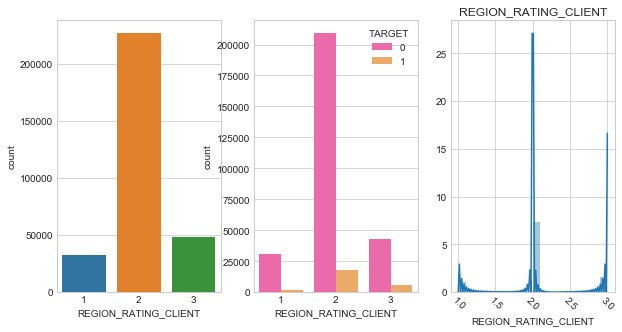

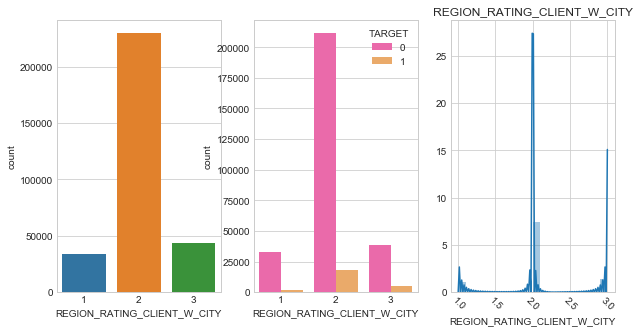

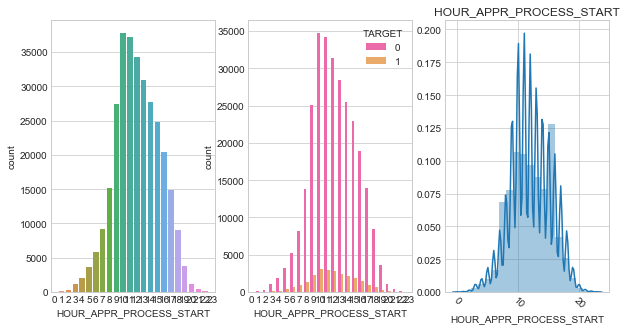

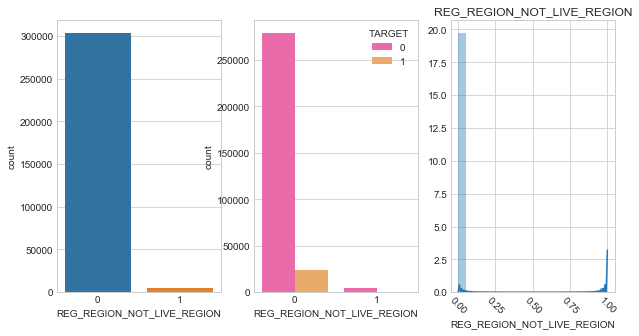

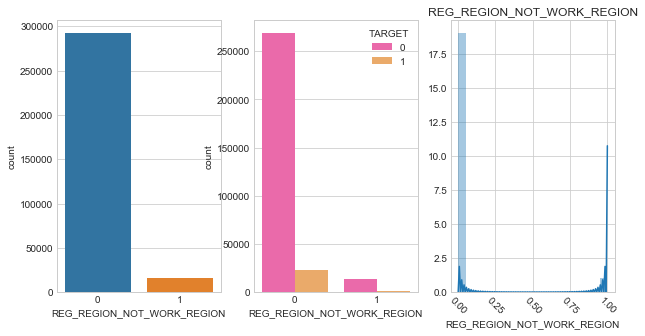

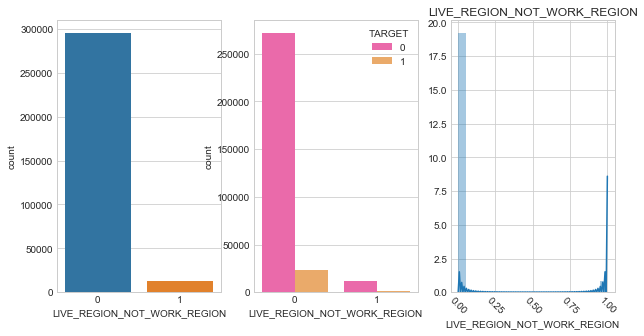

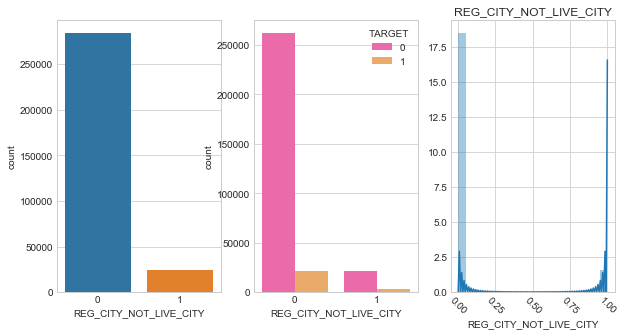

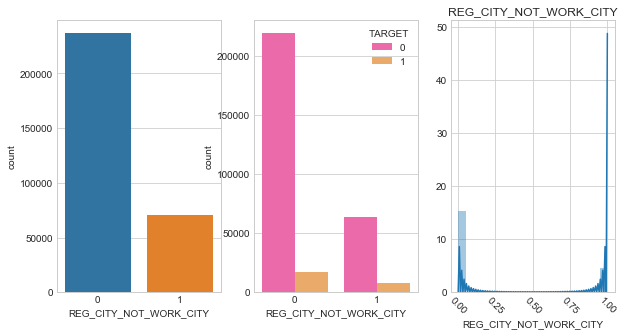

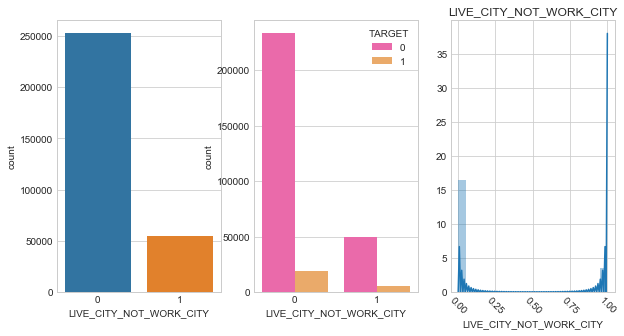

In [60]:
visual_dat= ['REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']


for i in visual_dat:
    plt.figure(figsize = (10,5))
    plt.subplot(1,3,1)
    sns.countplot(application_train[i])
    plt.subplot(1,3,2)
    sns.countplot(application_train[i],hue=application_train['TARGET'],palette="spring")
    plt.subplot(1,3,3)
    sns.distplot(application_train[i],bins= 20) 
    plt.title(i)
    plt.xticks(rotation=-45)
    plt.show()
    


### By looking at the above given we can clear get id of which loan Repayer vs NOn Payer  all features list in above plot

1. 1. ### Analysis Based on EXter Source Types

Text(0.5,1,'EXt Source 3 Distribution')

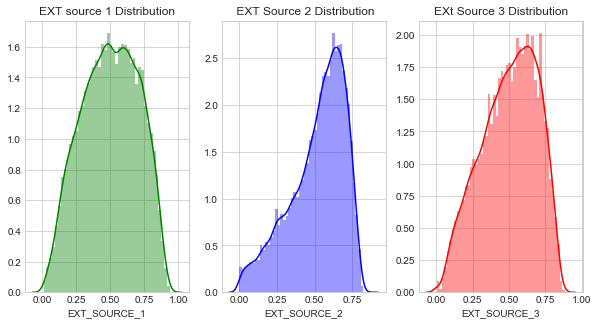

In [61]:
# Set up the matplotlib figure
f, ax = plt.subplots(ncols=3,figsize=(10, 5))


sns.distplot(application_test.EXT_SOURCE_1.dropna(), kde=True, color="g", 
             ax=ax[0]).set_title('EXT source 1 Distribution')



sns.distplot(application_test.EXT_SOURCE_2.dropna(), kde=True, color="b",
             ax=ax[1]).set_title(' EXT Source 2 Distribution')

 
sns.distplot(application_test.EXT_SOURCE_3.dropna(), kde=True, 
             color="r", ax=ax[2]).set_title('EXt Source 3 Distribution')




### Analysis based Averages values

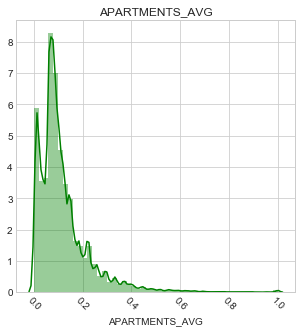

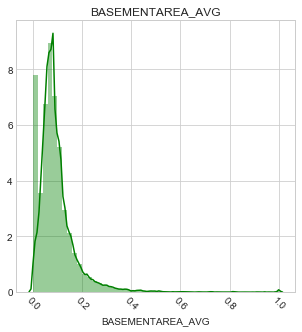

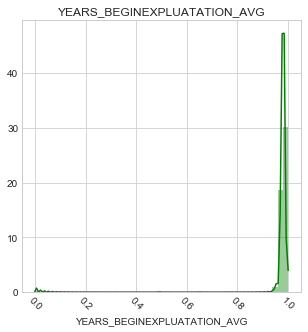

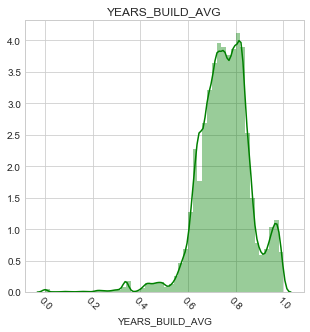

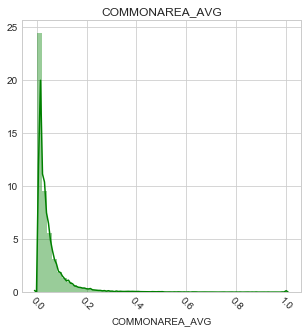

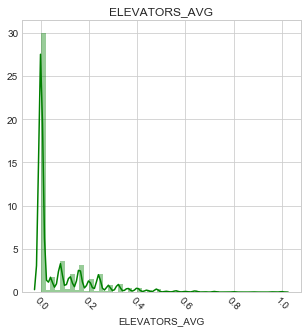

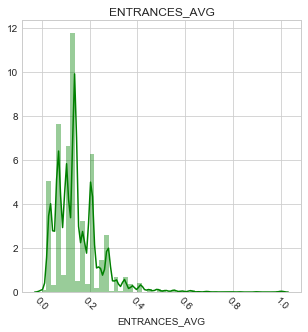

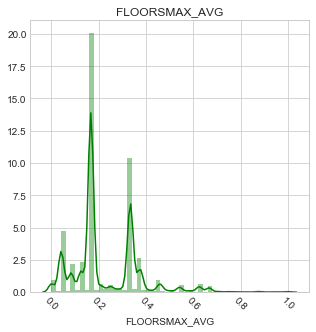

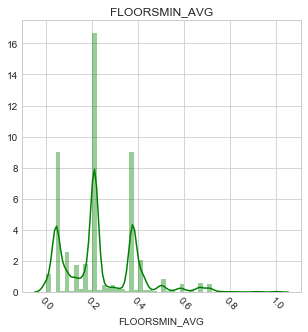

In [62]:
val_p=['APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG']
#color_types = ['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0','#F8D030',  
 #               '#E0C068','#EE99AC','#C03028','#F85888','#B8A038','#705898','#98D8D8','#7038F8']
for i in val_p:
    plt.figure(figsize = (5,5))
    sns.distplot(application_train[i].dropna(), kde=True, color='g')        
    plt.title(i)
    plt.xticks(rotation=-45)
    plt.show()
    

### Checking the  Correlation Between The Features for Application Train Dataset

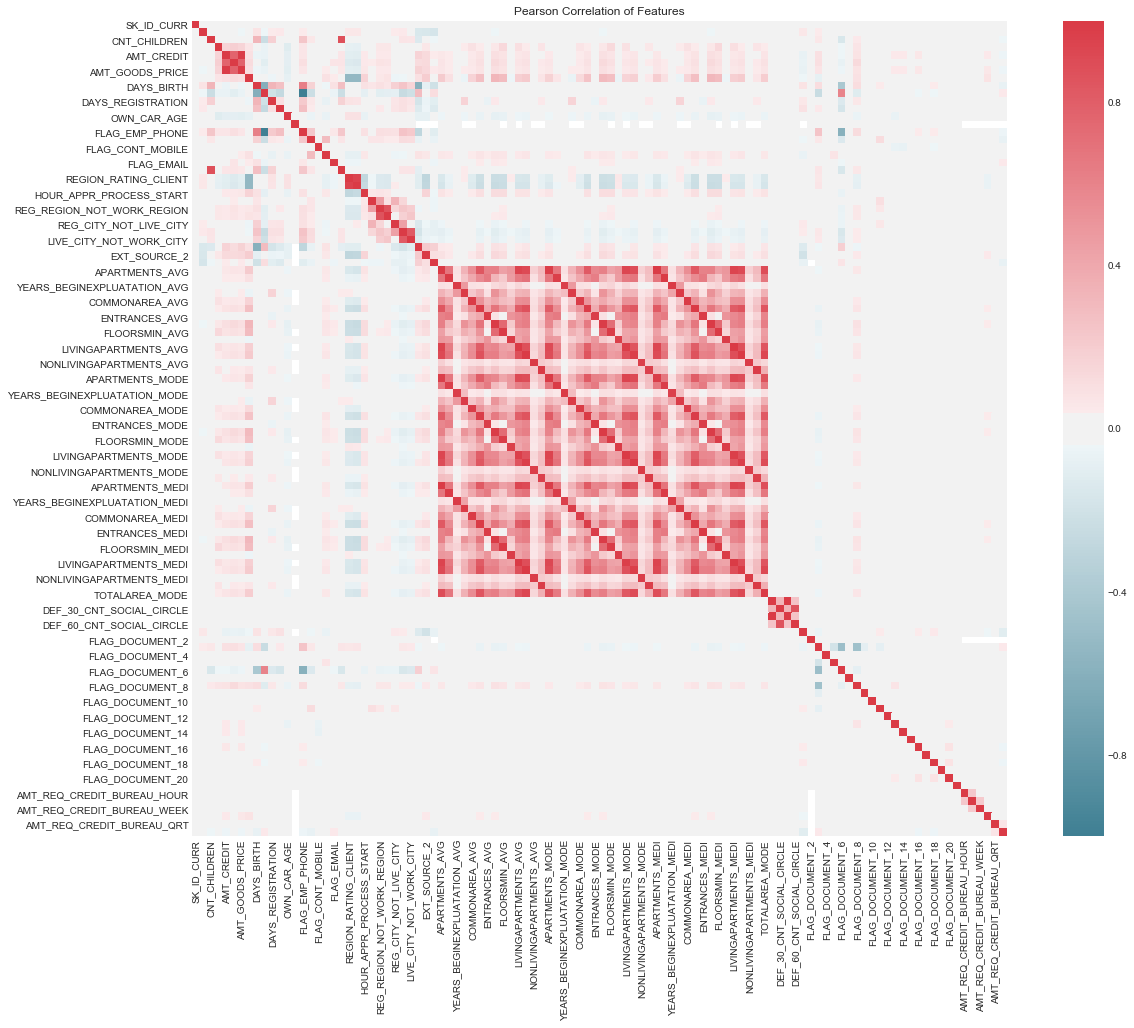

In [63]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(20,15))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        #cbar_kws={'shrink':.9 }, 
        #ax=ax,
        #annot=True, 
        #linewidths=0.1,vmax=1.0, linecolor='white',
        #annot_kws={'fontsize':16}
    )
    
    plt.title('Pearson Correlation of Features')

correlation_heatmap(application_train)



### If look at the above given plot is clear that all AVG featuers are high correleted values by seeing this plot we can easy find out the coorelated features

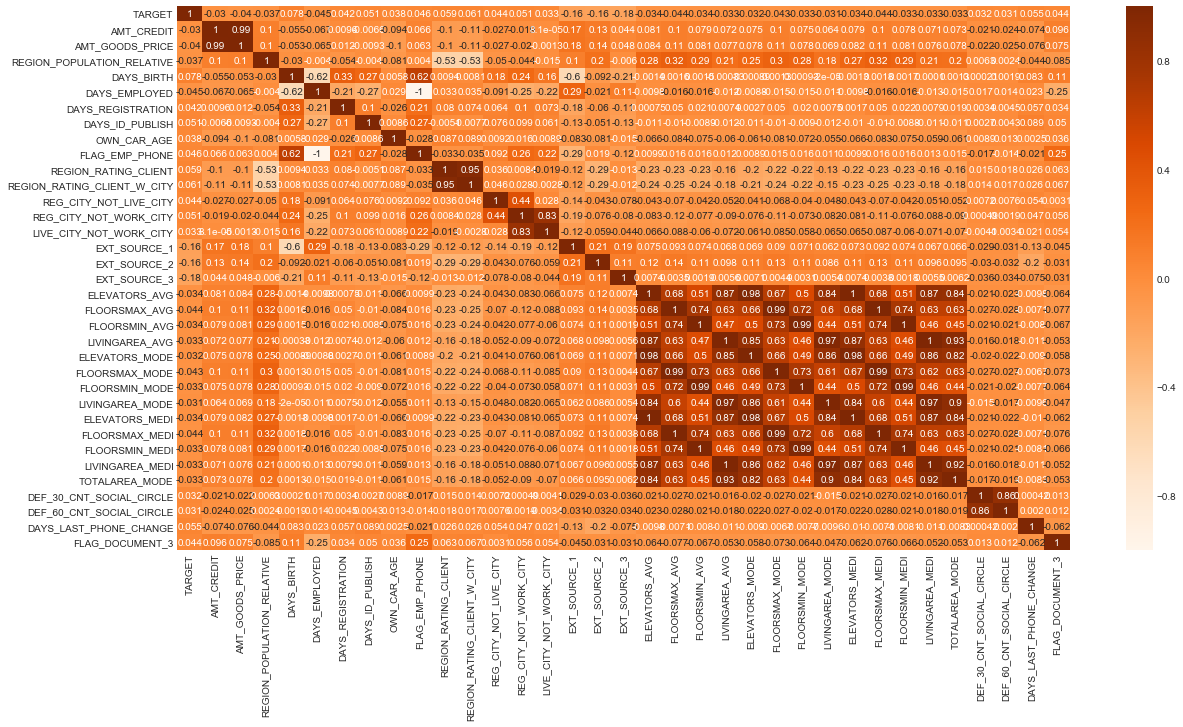

In [3]:
# most correlated features
corrmat = application_train.corr()
top_corr_features = corrmat.index[abs(corrmat["TARGET"])>=0.03]
plt.figure(figsize=(20,10))
g = sns.heatmap(application_train[top_corr_features].corr(),annot=True,cmap="Oranges")

#### **By see above given two  corelation plot  we can easy find out  the most corelated featuers along with they corelated values.  and all kind of analysis are done for the application train dataset.

## EDA of Bureau Data

All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample). For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.

In [ ]:
#ap_train=application_train
#br_data=bureau

### Merging the bureau dataset along with application train dataset to do more analysis

In [ ]:
#print('Applicatoin train shape before merge: ', ap_train.shape)
#ap_train = ap_train.merge(br_data, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')
#print('Applicatoin train shape after merge: ', ap_train.shape)

### Analysis Based on CREDIT ACTIVE, CREDIT_CURRENCY, CREDIT TYPE

#### the abov given take a long to time  so i have add the link of my kaggle kernal which has result
[[https://www.kaggle.com/vinothan/prefect-eda-for-house-credit-default-risk]](1)

In [ ]:
#plot_re(ap_train,'CREDIT_ACTIVE','TARGET')

In [ ]:
#plot_re(ap_train,'CREDIT_CURRENCY','TARGET')

In [ ]:
#plot_re(ap_train,'CREDIT_TYPE','TARGET')

### BASED on above  given plot it clear that the Credit type consumer credit has high count of non payer of loan and credit currency customer with currency 1 has high count of non payer and based credit active customer with in group of closed customer has high count of non payer

Text(0.5,1,'DAYS CREDIT UPDATE Distribution')

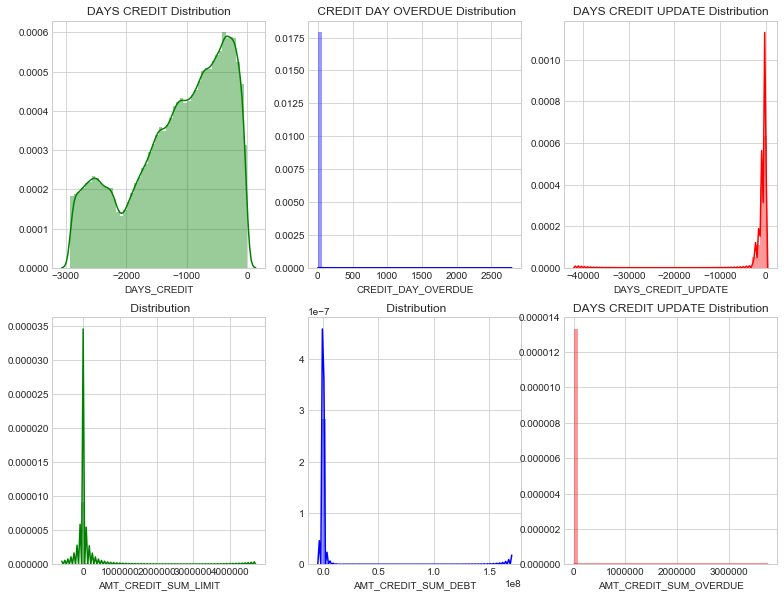

In [4]:
f, ax = plt.subplots(2,3,figsize=(13, 10))


sns.distplot(bureau.DAYS_CREDIT.dropna(), kde=True, color="g", 
             ax=ax[0,0]).set_title('DAYS CREDIT Distribution')



sns.distplot(bureau.CREDIT_DAY_OVERDUE.dropna(), kde=True, color="b",
             ax=ax[0,1]).set_title(' CREDIT DAY OVERDUE Distribution')

 
sns.distplot(bureau.DAYS_CREDIT_UPDATE.dropna(), kde=True, 
             color="r", ax=ax[0,2]).set_title('DAYS CREDIT UPDATE Distribution')

sns.distplot(bureau.AMT_CREDIT_SUM_LIMIT.dropna(), kde=True, color="g", 
             ax=ax[1,0]).set_title(' Distribution')



sns.distplot(bureau.AMT_CREDIT_SUM_DEBT.dropna(), kde=True, color="b",
             ax=ax[1,1]).set_title(' Distribution')

 
sns.distplot(bureau.AMT_CREDIT_SUM_OVERDUE.dropna(), kde=True, 
             color="r", ax=ax[1,2]).set_title('DAYS CREDIT UPDATE Distribution')


### ABOVE given plots show distributions

### EAD for bureau balance Dataset

Text(0.5,1,'count based on status type')

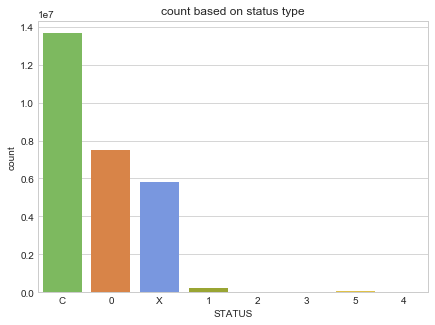

In [6]:

f, ax = plt.subplots(figsize=(7,5))

# Types of colors
color_types = ['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0','#F8D030',  
                '#E0C068','#EE99AC','#C03028','#F85888','#B8A038','#705898','#98D8D8','#7038F8']

# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='STATUS', data=bureau_balance,palette=color_types).set_title('count based on status type')


### based  type its clear that status c, o,x has high count in bureau balnace dataset

### EDA for previous application dataset

''

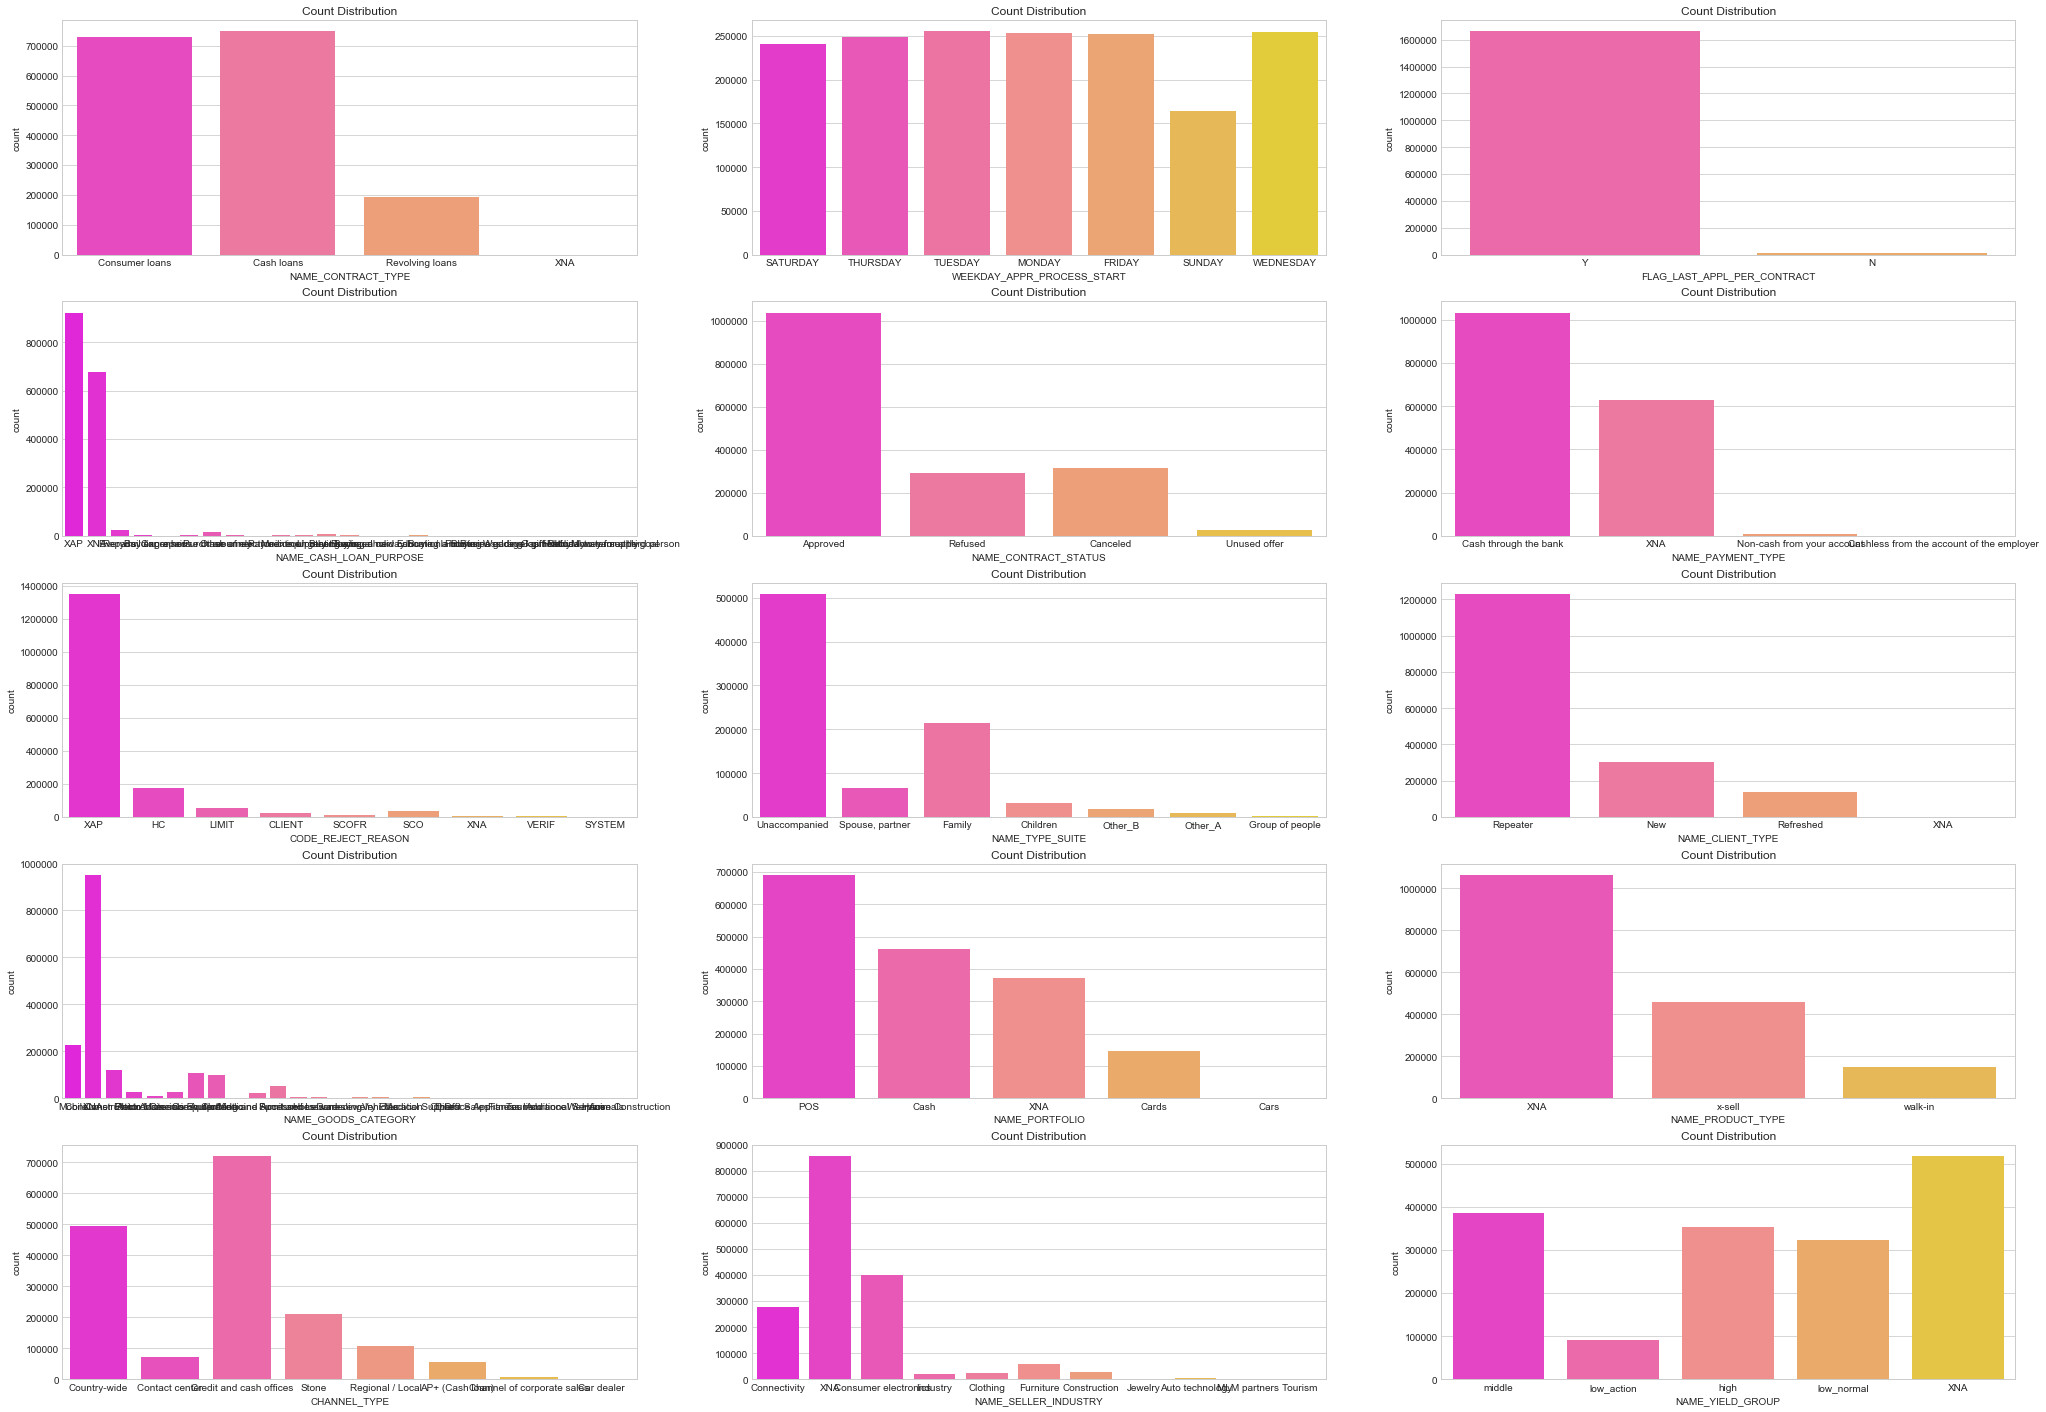

In [7]:
f, ax = plt.subplots(5,3,figsize=(35,25))

 

sns.countplot(previous_application.NAME_CONTRACT_TYPE.dropna(), palette='spring', 
             ax=ax[0,0]).set_title('Count Distribution')



sns.countplot(previous_application.WEEKDAY_APPR_PROCESS_START.dropna(), palette='spring', 
             ax=ax[0,1]).set_title('Count Distribution')



sns.countplot(previous_application.FLAG_LAST_APPL_PER_CONTRACT.dropna(), palette='spring', 
             ax=ax[0,2]).set_title('Count Distribution')



sns.countplot(previous_application.NAME_CASH_LOAN_PURPOSE.dropna(), palette='spring', 
             ax=ax[1,0]).set_title('Count Distribution')



 
sns.countplot(previous_application.NAME_CONTRACT_STATUS.dropna(), palette='spring', 
             ax=ax[1,1]).set_title('Count Distribution')



sns.countplot(previous_application.NAME_PAYMENT_TYPE.dropna(), palette='spring', 
             ax=ax[1,2]).set_title('Count Distribution')



sns.countplot(previous_application.CODE_REJECT_REASON.dropna(), palette='spring', 
             ax=ax[2,0]).set_title('Count Distribution')



sns.countplot(previous_application.NAME_TYPE_SUITE.dropna(), palette='spring', 
             ax=ax[2,1]).set_title('Count Distribution')



sns.countplot(previous_application.NAME_CLIENT_TYPE.dropna(), palette='spring', 
             ax=ax[2,2]).set_title('Count Distribution')



sns.countplot(previous_application.NAME_GOODS_CATEGORY.dropna(), palette='spring', 
             ax=ax[3,0]).set_title('Count Distribution')


sns.countplot(previous_application.NAME_PORTFOLIO.dropna(), palette='spring', 
             ax=ax[3,1]).set_title('Count Distribution')


sns.countplot(previous_application.NAME_PRODUCT_TYPE.dropna(), palette='spring', 
             ax=ax[3,2]).set_title('Count Distribution')



sns.countplot(previous_application.CHANNEL_TYPE.dropna(), palette='spring', 
             ax=ax[4,0]).set_title('Count Distribution')



sns.countplot(previous_application.NAME_SELLER_INDUSTRY.dropna(), palette='spring', 
             ax=ax[4,1]).set_title('Count Distribution')



sns.countplot(previous_application.NAME_YIELD_GROUP.dropna(), palette='spring', 
             ax=ax[4,2]).set_title('Count Distribution')




,


### By looking at the above given plot its clear that which types has high count in each feature so we can easy out the root cause of the problem.

### analyzing the numerical features disturbion in previous application dataset

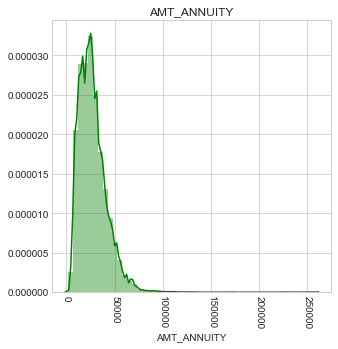

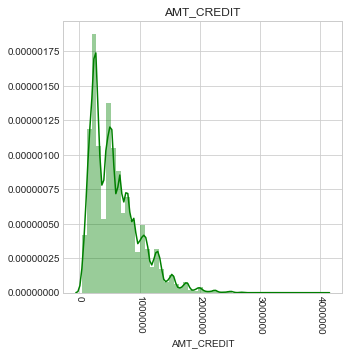

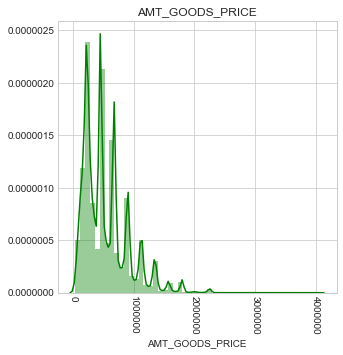

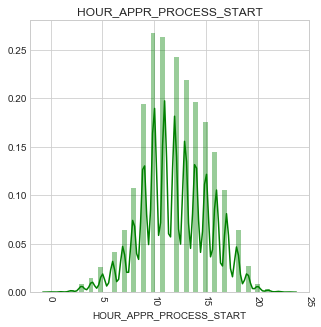

In [5]:
val_p=['AMT_ANNUITY',
       'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'HOUR_APPR_PROCESS_START']

for i in val_p:
    plt.figure(figsize = (5,5))
    sns.distplot(application_train[i].dropna(), kde=True, color='g')        
    plt.title(i)
    plt.xticks(rotation=-90)
    plt.show()

__This notebook which clearly show all the analysis part by using this analysis we can found out the root cause which customer will not able to pay the loan back or not___